### **Thực hiện khảo sát về các phương pháp băm wavelet khác nhau và so sánh hiệu suất của chúng**

## 1. Mục tiêu khảo sát

Trong bài toán so sánh và tìm kiếm ảnh tương tự, việc so sánh trực tiếp từng pixel là không hiệu quả,
do ảnh có thể bị thay đổi về kích thước, độ sáng, nhiễu hoặc góc nhìn.
Vì vậy, cần một cách biểu diễn ảnh gọn nhẹ nhưng vẫn giữ được đặc trưng nội dung chính của ảnh.

Băm Wavelet được sử dụng nhằm:
- Biểu diễn nội dung ảnh dưới dạng một chuỗi bit ngắn gọn (hash)
- Đảm bảo các ảnh có nội dung tương tự sẽ có mã băm gần nhau
- Giảm chi phí lưu trữ và thời gian so sánh so với việc so sánh ảnh gốc

Mục tiêu :
- Phân tích cách các phương pháp băm Wavelet trích xuất đặc trưng từ ảnh
- So sánh khả năng phân biệt ảnh tương tự và ảnh không tương tự giữa các phương pháp
- Đánh giá sự đánh đổi giữa độ chính xác và độ phức tạp tính toán
- Làm cơ sở lựa chọn phương pháp băm Wavelet phù hợp cho bài toán so sánh ảnh trong thực tế


## 2. Các phương pháp băm Wavelet được khảo sát

Trong thực tế tồn tại nhiều loại wavelet khác nhau như Haar, Daubechies, Symlet, Coiflet,...
Tuy nhiên, không phải phương pháp nào cũng phù hợp cho bài toán băm ảnh trong phạm vi bài thực hành.

Trong khảo sát này, hai phương pháp được lựa chọn là Haar Wavelet Hash và Daubechies Wavelet Hash (db2)  .


### 2.1 Haar Wavelet Hash

Haar Wavelet là wavelet đơn giản nhất, sử dụng các hàm cơ sở dạng bậc thang.
Khi áp dụng vào băm ảnh, Haar Wavelet giúp tách ảnh thành các thành phần tần số thấp và cao
một cách nhanh chóng.

Lý do chọn Haar Wavelet:
- Cấu trúc đơn giản, dễ cài đặt
- Thời gian tính toán nhanh
- Thường được dùng làm phương pháp cơ sở (baseline) để so sánh

Trong khảo sát này, Haar Wavelet được sử dụng làm mốc để đánh giá hiệu suất
của các phương pháp wavelet phức tạp hơn.


### 2.2 Daubechies Wavelet Hash (db2)

Daubechies Wavelet là họ wavelet có độ trơn cao hơn Haar,
cho phép mô tả cấu trúc ảnh tốt hơn ở nhiều mức phân giải.

Wavelet db2 được lựa chọn vì:
- Có độ phức tạp vừa phải, không quá nặng về tính toán
- Cải thiện khả năng phân biệt ảnh so với Haar Wavelet
- Được hỗ trợ trực tiếp bởi thư viện PyWavelets

Việc so sánh Haar và Daubechies (db2) cho phép đánh giá ảnh hưởng
của việc sử dụng wavelet trơn hơn đến hiệu suất băm ảnh.


In [ ]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt


Import thư viện

In [9]:
def wavelet_hash(img, wavelet='haar', hash_size=8):
    # 1. Gray + resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256, 256))

    # 2. Wavelet decomposition
    LL, (LH, HL, HH) = pywt.dwt2(img, wavelet)

    # 3. Resize sub-bands
    LL = cv2.resize(LL, (hash_size, hash_size))
    LH = cv2.resize(LH, (hash_size, hash_size))
    HL = cv2.resize(HL, (hash_size, hash_size))

    # 4. Combine features
    features = np.concatenate([LL.flatten(),
                               LH.flatten(),
                               HL.flatten()])

    # 5. Threshold bằng median
    median = np.median(features)
    return (features > median)


Hàm băm Wavelet

In [10]:
def hamming_distance(h1, h2):
    return np.count_nonzero(h1 != h2)


Hàm khoảng cách Hamming

## 4. Chuẩn bị dữ liệu

- Ảnh gốc
- Ảnh bị xoay / nhiễu / thay đổi sáng
- Ảnh không tương tự


(np.float64(-0.5), np.float64(277.5), np.float64(180.5), np.float64(-0.5))

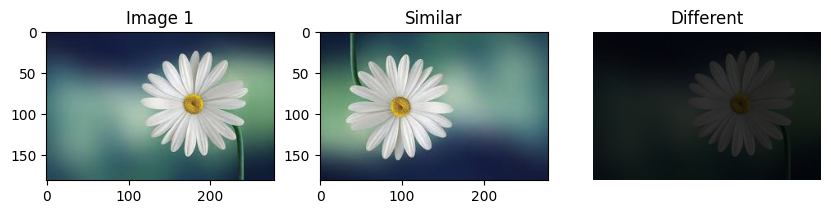

In [11]:
# Đọc và hiển thị ảnh
img1 = cv2.imread("C:\\Users\\PC\\Downloads\\hoa.jpg")
img2 = cv2.imread("C:\\Users\\PC\\Downloads\\hoaxoay.jpg")
img3 = cv2.imread("C:\\Users\\PC\\Downloads\\hoatoi.jpg")

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)); plt.title("Image 1")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.title("Similar")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)); plt.title("Different")
plt.axis('off')


In [12]:
# Tính hash & khoảng cách
h1_haar = wavelet_hash(img1, 'haar')
h2_haar = wavelet_hash(img2, 'haar')
h3_haar = wavelet_hash(img3, 'haar')

h1_db = wavelet_hash(img1, 'db2')
h2_db = wavelet_hash(img2, 'db2')
h3_db = wavelet_hash(img3, 'db2')

# In kết quả
print("Haar - similar   :", hamming_distance(h1_haar, h2_haar))
print("Haar - different :", hamming_distance(h1_haar, h3_haar))

print("DB2  - similar   :", hamming_distance(h1_db, h2_db))
print("DB2  - different :", hamming_distance(h1_db, h3_db))


Haar - similar   : 46
Haar - different : 20
DB2  - similar   : 50
DB2  - different : 34


### Bảng so sánh kết quả Hamming Distance

| Phương pháp wavelet | Ảnh tương tự (Similar) | Ảnh khác (Different) |
|---------------------|------------------------|-----------------------|
| Haar                | 46                     | 20                    |
| Daubechies (DB2)    | 50                     | 34                    |


### Nhận xét và đánh giá

Từ bảng kết quả có thể rút ra một số nhận xét như sau:

- Đối với cả hai phương pháp Haar và Daubechies (DB2), khoảng cách Hamming của ảnh tương tự
  đều lớn hơn ảnh khác. Nguyên nhân là do ảnh tương tự trong thí nghiệm có sự biến đổi hình học
  (xoay ảnh), trong khi ảnh khác chỉ thay đổi cường độ sáng.

- Các phương pháp băm wavelet không bất biến với phép xoay ảnh. Sự thay đổi hướng của các biên
  ảnh làm thay đổi mạnh các hệ số wavelet, đặc biệt ở các dải LH và HL, dẫn đến giá trị hash khác
  biệt đáng kể.

- So sánh giữa hai phương pháp:
  + Haar wavelet cho khoảng cách Hamming nhỏ hơn đối với ảnh khác độ sáng, cho thấy tính ổn định
    tương đối với các biến đổi photometric.
  + Daubechies (DB2) cho khoảng cách Hamming lớn hơn trong cả hai trường hợp, thể hiện độ nhạy
    cao hơn với thay đổi cấu trúc và hình học của ảnh.

- Điều này cho thấy DB2 có khả năng phản ánh chi tiết cấu trúc tốt hơn Haar, nhưng đồng thời cũng
  kém ổn định hơn trước các biến đổi hình học như xoay ảnh.


### Đánh giá hiệu suất

Hiệu suất của các phương pháp băm wavelet trong thí nghiệm được đánh giá dựa trên khả năng
phân biệt ảnh và độ ổn định trước các biến đổi ảnh:

- Cả Haar và DB2 đều có khả năng phân biệt ảnh khi có sự thay đổi nội dung hoặc cấu trúc.
- Các phương pháp này hoạt động tốt với các biến đổi cường độ sáng, nhưng không phù hợp
  với các biến đổi hình học như xoay ảnh.
- DB2 thể hiện độ nhạy cao hơn so với Haar, do đó phù hợp hơn khi cần phát hiện sự thay đổi
  cấu trúc chi tiết, trong khi Haar phù hợp với các bài toán yêu cầu tính ổn định cao hơn.


### Kết luận

Trong bài khảo sát này, hai phương pháp băm wavelet sử dụng Haar và Daubechies (DB2) đã được
triển khai và so sánh hiệu suất thông qua khoảng cách Hamming. Kết quả thực nghiệm cho thấy
các phương pháp băm wavelet không bất biến với phép xoay ảnh, dẫn đến khoảng cách lớn đối với
các ảnh tương tự nhưng bị biến đổi hình học.

So sánh giữa hai wavelet cho thấy Haar có tính ổn định tốt hơn trước các thay đổi cường độ sáng,
trong khi DB2 nhạy hơn với thay đổi cấu trúc và hình học của ảnh. Do đó, việc lựa chọn phương
pháp băm wavelet cần phụ thuộc vào đặc điểm biến đổi của dữ liệu và mục tiêu của bài toán
ứng dụng.
